In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import DOMWidget, widget_serialization
from matplotlib import is_interactive, rcParams
from matplotlib._pylab_helpers import Gcf
from matplotlib.backend_bases import NavigationToolbar2, _Backend, cursors
from matplotlib.backends.backend_webagg_core import (
    FigureCanvasWebAggCore,
    FigureManagerWebAgg,
    NavigationToolbar2WebAgg,
    TimerTornado,
)
%matplotlib
import ipympl



ModuleNotFoundError: No module named 'ipywidgets'

In [113]:
import numpy as np
from scipy.signal import windows
from scipy.constants import c
from scipy.signal import stft
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

CSV file 'sweep.csv' generated successfully!


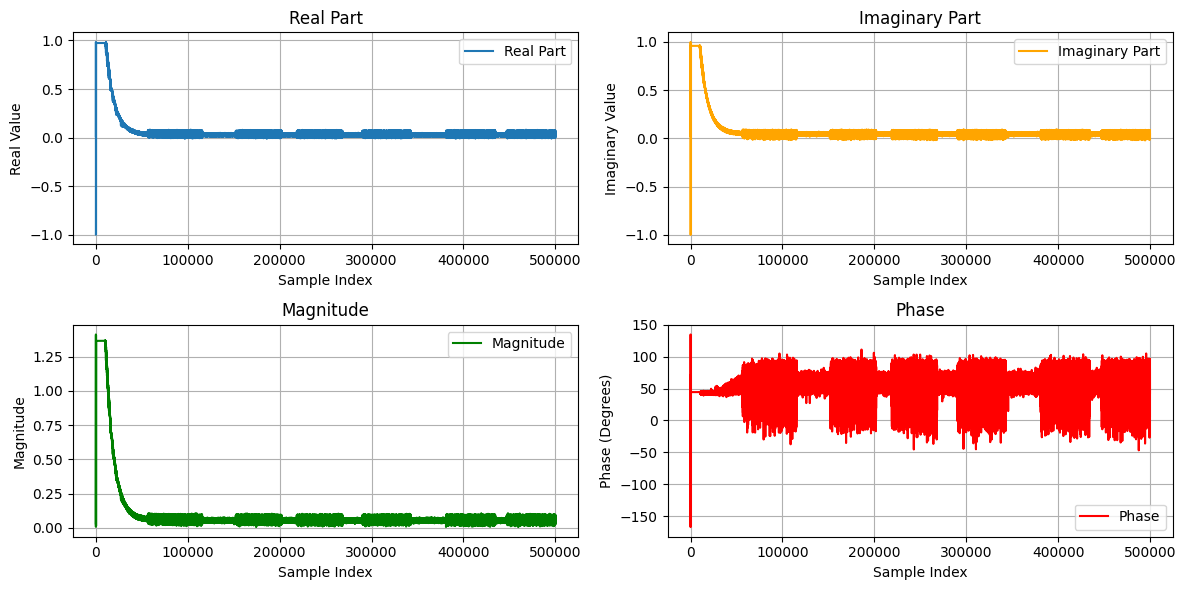

500000


In [50]:


# Define the path to your binary file
file_path = 'outputs/loopback_from_file_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]


# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]

fs = 25e6
fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_freq_axis = np.fft.fftfreq(len(fft_data),1/fs)

# Compute magnitude and phase
magnitudes = np.abs(complex_data)
phases = np.angle(complex_data, deg=True)  # Phase in degrees

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot real part
real = np.real(complex_data)
#real = moving_average_filter(real,10)
axs[0, 0].plot(real, label='Real Part')
axs[0, 0].set_title('Real Part')
axs[0, 0].set_xlabel('Sample Index')
axs[0, 0].set_ylabel('Real Value')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot imaginary part
axs[0, 1].plot(np.imag(complex_data), label='Imaginary Part', color='orange')
axs[0, 1].set_title('Imaginary Part')
axs[0, 1].set_xlabel('Sample Index')
axs[0, 1].set_ylabel('Imaginary Value')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot magnitude
axs[1, 0].plot(magnitudes, label='Magnitude', color='green')
axs[1, 0].set_title('Magnitude')
axs[1, 0].set_xlabel('Sample Index')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot phase
axs[1, 1].plot(phases, label='Phase', color='red')
axs[1, 1].set_title('Phase')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Phase (Degrees)')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

print(num_new_samples)

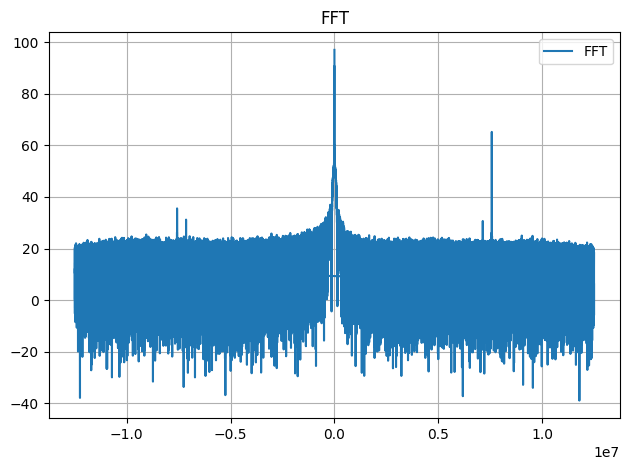

In [2]:
file_path = 'rx_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]


fs = 25e6
N = len(complex_data)


#fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
magnitude_db = 20 * np.log10(magnitude)


max_freq_desired = 50e6
index = int(round(max_freq_desired*N/fs))



#fft_freq_axis = fft_freq_axis[0:index]
#magnitude_db = magnitude_db[0:index]


# Plotting fft
fig, axs = plt.subplots()
axs.plot(fft_freq_axis, magnitude_db, label='FFT')
axs.set_title('FFT')
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

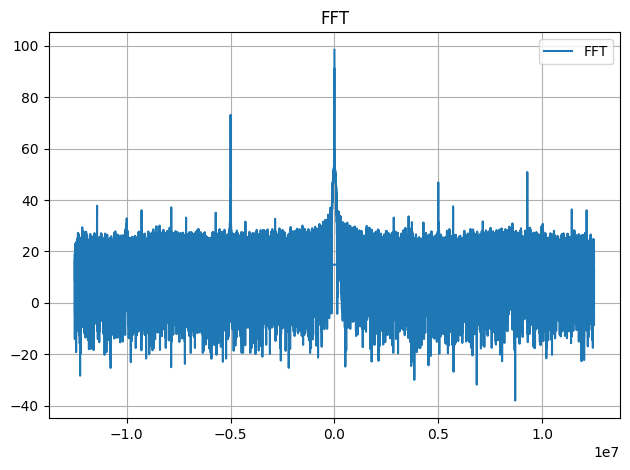

In [6]:
file_path = 'loopback_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))
#data = data[30000:32000]

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]


fs = 25e6
N = len(complex_data)


#fft_data = np.fft.fftshift(np.fft.fft(complex_data))
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
magnitude_db = 20 * np.log10(magnitude)


max_freq_desired = 50e6
index = int(round(max_freq_desired*N/fs))



#fft_freq_axis = fft_freq_axis[0:index]
#magnitude_db = magnitude_db[0:index]


# Plotting fft
fig, axs = plt.subplots()
axs.plot(fft_freq_axis, magnitude_db, label='FFT')
axs.set_title('FFT')
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3084/712474423.py:16: RuntimeWarning: overflow encountered in cos
  sample = 0.5 * np.cos(1j * phase) + 0j  # 0j denotes a complex number with zero imaginary part
/tmp/ipykernel_3084/712474423.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  sample = 0.5 * np.cos(1j * phase) + 0j  # 0j denotes a complex number with zero imaginary part


PRI: 0.0004


/home/murray/sdr-config/sdr/lib/python3.10/site-packages/numpy/fft/_pocketfft.py:94: RuntimeWarning: invalid value encountered in fft
  return ufunc(a, fct, axes=[(axis,), (), (axis,)], out=out)


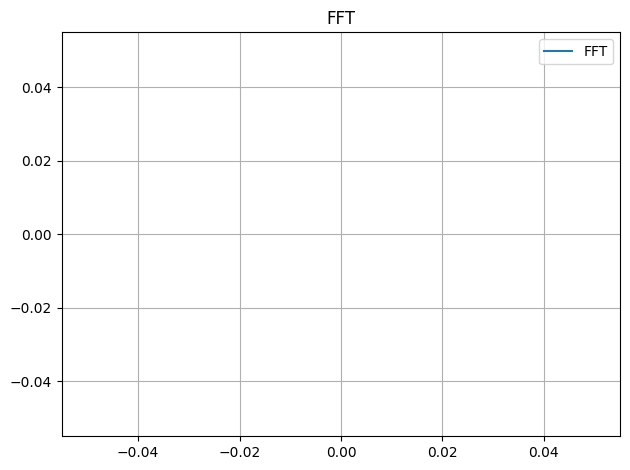

In [118]:
# write to csv for TX

# params
# relative to TX centre freq
signalLength = 50000
startFrequency = 0
endFrequency = 2e6
sampleRate = 50e6

result = []

for i in range(signalLength):
    t = i / sampleRate
    frequency = startFrequency + (endFrequency - startFrequency) * i / signalLength
    phase = 2.0 * np.pi * frequency * t
    sample = 0.5 * np.exp(1j * phase) + 0j  # 0j denotes a complex number with zero imaginary part
    result.append(sample)

zeros = 10000
print("PRI: " + str(zeros/25e6))
for i in range(10000):
    result.append(0)
result = np.array(result)

# Write to CSV file
with open('sweep.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for sample in result:
        csvwriter.writerow([sample.real, sample.imag])

fft_data = np.fft.fftshift(np.fft.fft(result))
N = len(fft_data)
T = 1/fs
freqs = np.fft.fftshift(np.fft.fftfreq(N, T))

# Plotting fft
fig, axs = plt.subplots()
axs.plot(np.real(fft_data), label='FFT')
axs.set_title('FFT')
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3084/2216538164.py:23: UserWarning: Input data is complex, switching to return_onesided=False
  frequencies, times, Zxx = stft(complex_data, fs=fs, nperseg=nperseg, noverlap=noverlap)


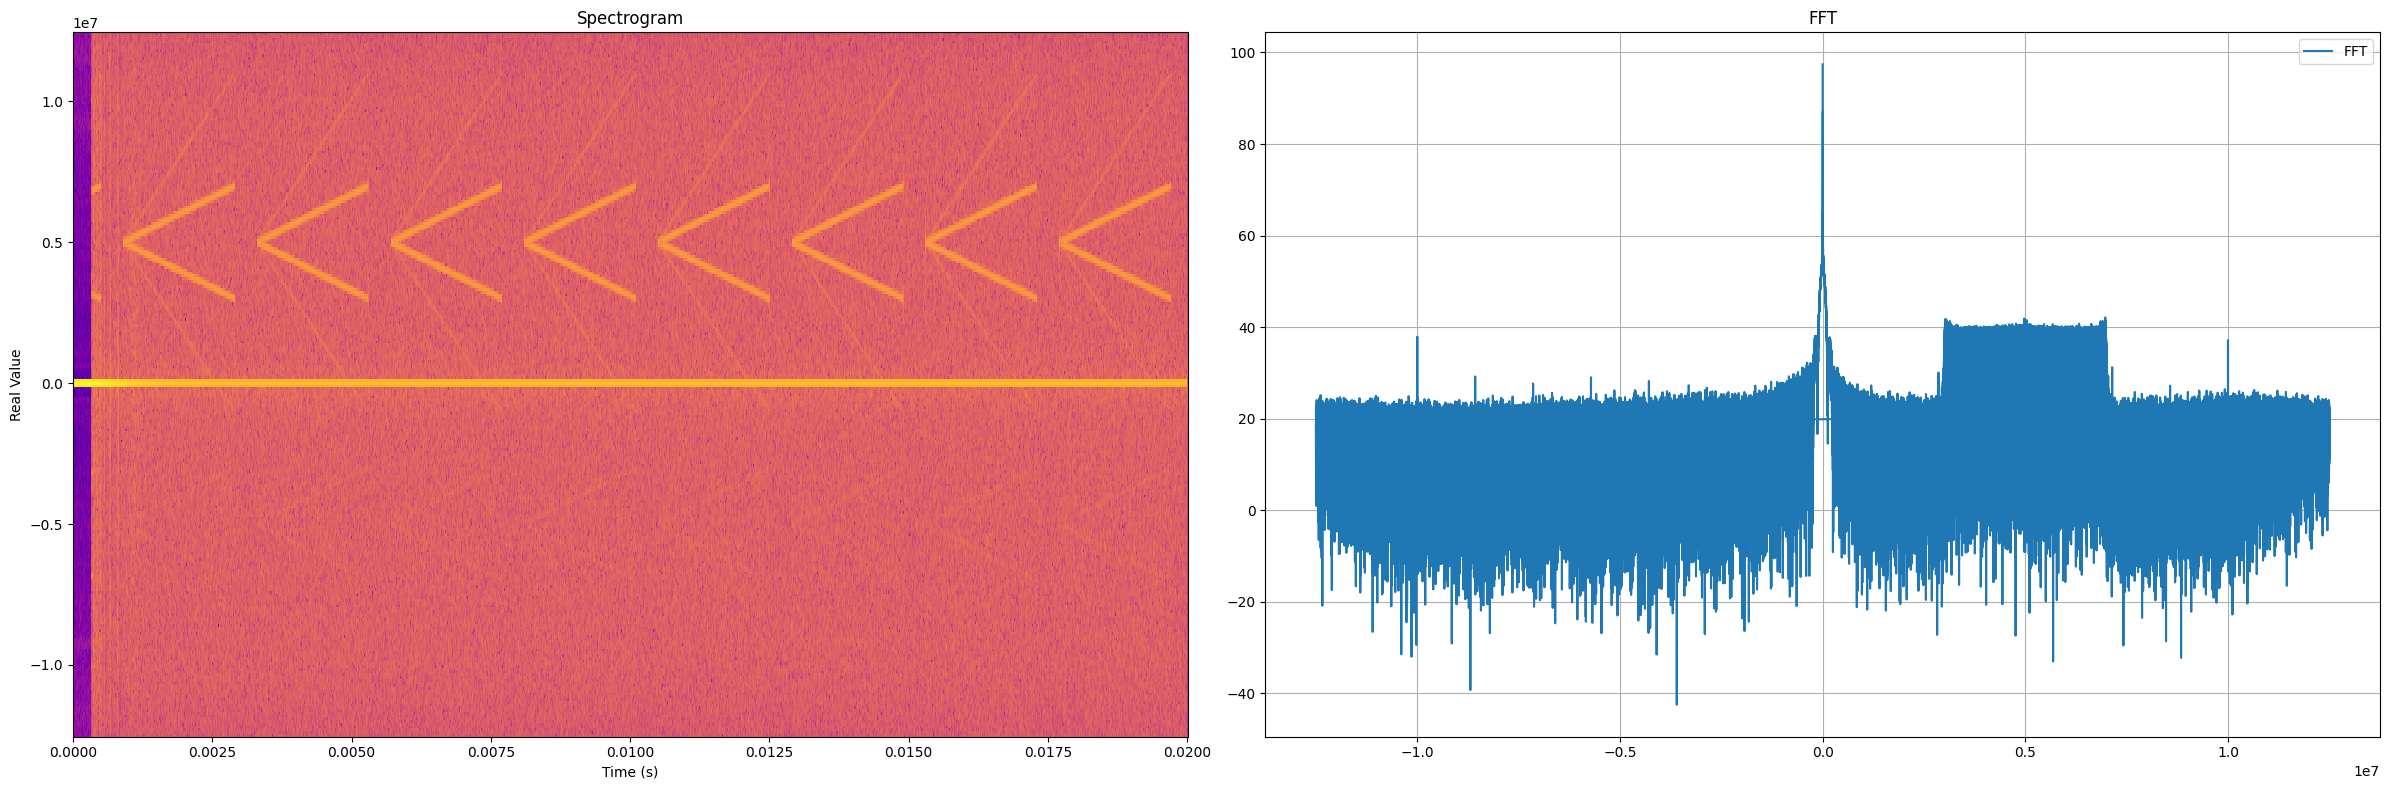

In [115]:
# waterfall

file_path = 'outputs/loopback_from_file_test.bin'
fs = 25e6

# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))

# Create complex numbers from the real and imaginary parts
complex_data = data[:, 0] + 1j * data[:, 1]

# Compute the Short-Time Fourier Transform (STFT)
nperseg = 256  # Number of samples per segment
noverlap = nperseg // 2  # Number of overlapping samples
frequencies, times, Zxx = stft(complex_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Shift the zero frequency component to the center
Zxx_shifted = np.fft.fftshift(Zxx, axes=0)
frequencies_shifted = np.fft.fftshift(frequencies)

# Compute the magnitude of the STFT
magnitude_spectrogram = np.abs(Zxx_shifted)



# Plotting spectrogram
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

axs[0].pcolormesh(times, frequencies_shifted, magnitude_spectrogram, shading='auto', cmap='plasma', norm=LogNorm())
#axs[0].set_colorbar(label='Magnitude (dB)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Real Value')
axs[0].set_title('Spectrogram')

# plotting fft
fft_data = np.fft.fft(complex_data)
fft_freq_axis = np.fft.fftfreq(len(fft_data),d=1/fs)

# convert to db
magnitude = np.abs(fft_data)
magnitude_db = 20 * np.log10(magnitude)

axs[1].plot(fft_freq_axis, magnitude_db, label='FFT')
axs[1].set_title('FFT')
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()



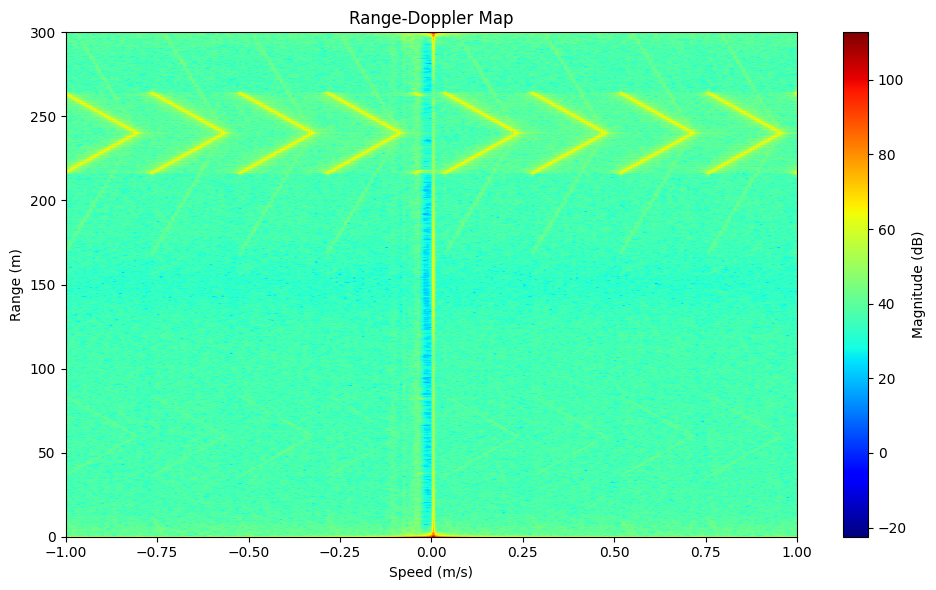

In [66]:
# range doppler...


file_path = 'outputs/loopback_from_file_test.bin'


# Read the binary file
with open(file_path, 'rb') as file:
    # Read the data into a numpy array
    # The dtype should match the type of data in the file (double = float64)
    data = np.fromfile(file, dtype=np.float64)

# Reshape or process the data if needed
# Here we assume data was written as 2 doubles per sample
num_new_samples = int(len(data)/2)
data = data.reshape((num_new_samples, 2))

# Create complex numbers from the real and imaginary parts
iq_data = data[:, 0] + 1j * data[:, 1]

# Apply window function (e.g., Hamming window)
#window = np.hamming(iq_data.shape[0])
#windowed_data = iq_data * window

# Perform Range FFT (along the first axis)
range_fft = np.fft.fft(iq_data, axis=0)

#Reshape the data to prepare for Doppler FFT
# Parameters
B = 2e6  # Bandwidth in Hz
PRI = 4e-4  # Pulse Repetition Interval in seconds 
num_range_bins = 250
num_doppler_bins = num_new_samples // num_range_bins

# Calculate range resolution and maximum range
range_res = c / (2 * B)
r_max = range_res * num_range_bins

# Calculate Doppler resolution and maximum Doppler shift
doppler_res = c / (2 * num_new_samples * PRI)
v_max = doppler_res * num_doppler_bins

# Define the zoom-in range in meters and speed in m/s
zoom_range = 300  # meters
zoom_speed = 1  # meters per second (example speed range)

# Calculate limits for zooming
range_min = 0
range_max = min(zoom_range, r_max)
doppler_min = -zoom_speed
doppler_max = zoom_speed

fig, axs = plt.subplots(1, figsize=(10, 6))
# Check if the division is exact, otherwise, reshape may fail
if num_doppler_bins * num_range_bins == num_new_samples:
    range_fft = range_fft.reshape((num_doppler_bins, num_range_bins))

    # Perform Doppler FFT (along the second axis)
    doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, axis=1), axes=1)

    # Calculate the magnitude of the complex result
    range_doppler_map = np.abs(doppler_fft)

    # Convert to dB scale
    range_doppler_map_db = 20 * np.log10(range_doppler_map)

    # Plot the Range-Doppler Map
    # Plot the Range-Doppler Map with physical units
    extent = [doppler_min, doppler_max, range_min, range_max] # extent = [min_doppler, max_doppler, min_range, max_range]
    
    cax = axs.imshow(range_doppler_map_db, extent=extent, aspect='auto', cmap='jet')
    #plt.colorbar(label='Magnitude (dB)')
    axs.set_xlabel('Speed (m/s)')
    axs.set_ylabel('Range (m)')
    axs.set_title('Range-Doppler Map')
    
else:
    print("Error: Data cannot be reshaped into the desired number of range and Doppler bins.")



# Add a colorbar with label
cbar = plt.colorbar(cax, ax=axs)
cbar.set_label('Magnitude (dB)')

plt.tight_layout()
plt.show()